In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.feature_selection import SelectFromModel, SelectKBest, SelectPercentile, RFE
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pandas.api.types import is_numeric_dtype
from sklearn.linear_model import Ridge, Lasso
import matplotlib.pyplot as plt

In [17]:
properti_price = pd.read_csv('Dataset UTS_Gasal 2425.csv')
properti_price.head(100)

,squaremeters,numberofrooms,hasyard,haspool,floors,citycode,citypartrange,numprevowners,made,isnewbuilt,hasstormprotector,basement,attic,garage,hasstorageroom,hasguestroom,price,category
0,75523,3,no,yes,63,9373,3,8,2005,old,yes,4313,9005,956,no,7,7559081.5,Luxury
1,55712,58,no,yes,19,34457,6,8,2021,old,no,2937,8852,135,yes,9,5574642.1,Middle
2,86929,100,yes,no,11,98155,3,4,2003,new,no,6326,4748,654,no,10,8696869.3,Luxury
3,51522,3,no,no,61,9047,8,3,2012,new,yes,632,5792,807,yes,5,5154055.2,Middle
4,96470,74,yes,no,21,92029,4,2,2011,new,yes,5414,1172,716,yes,9,9652258.1,Luxury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,98868,41,no,yes,67,85917,7,3,2021,new,yes,2146,1077,623,yes,3,9892300.1,Luxury
96,83110,43,yes,no,75,55046,7,10,2001,new,no,4108,5663,380,yes,7,8321631.1,Luxury
97,71154,67,no,yes,53,8762,2,6,2021,new,yes,8418,7187,706,no,8,7122699.1,Luxury
98,90841,48,yes,no,15,25300,6,5,2003,old,no,3333,149,842,no,9,9086177.3,Luxury


In [18]:
properti_price2 = properti_price.drop('category', axis=1)
properti_price2.head(100)

,squaremeters,numberofrooms,hasyard,haspool,floors,citycode,citypartrange,numprevowners,made,isnewbuilt,hasstormprotector,basement,attic,garage,hasstorageroom,hasguestroom,price
0,75523,3,no,yes,63,9373,3,8,2005,old,yes,4313,9005,956,no,7,7559081.5
1,55712,58,no,yes,19,34457,6,8,2021,old,no,2937,8852,135,yes,9,5574642.1
2,86929,100,yes,no,11,98155,3,4,2003,new,no,6326,4748,654,no,10,8696869.3
3,51522,3,no,no,61,9047,8,3,2012,new,yes,632,5792,807,yes,5,5154055.2
4,96470,74,yes,no,21,92029,4,2,2011,new,yes,5414,1172,716,yes,9,9652258.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,98868,41,no,yes,67,85917,7,3,2021,new,yes,2146,1077,623,yes,3,9892300.1
96,83110,43,yes,no,75,55046,7,10,2001,new,no,4108,5663,380,yes,7,8321631.1
97,71154,67,no,yes,53,8762,2,6,2021,new,yes,8418,7187,706,no,8,7122699.1
98,90841,48,yes,no,15,25300,6,5,2003,old,no,3333,149,842,no,9,9086177.3


In [19]:
properti_price2.info

<bound method DataFrame.info of       squaremeters  numberofrooms hasyard haspool  floors  citycode  \
0            75523              3      no     yes      63      9373   
1            55712             58      no     yes      19     34457   
2            86929            100     yes      no      11     98155   
3            51522              3      no      no      61      9047   
4            96470             74     yes      no      21     92029   
...            ...            ...     ...     ...     ...       ...   
9995           341             83      no      no       8      1960   
9996         21514              5      no     yes      11     91373   
9997          1726             89      no     yes       5     73133   
9998         44403             29     yes     yes      12     34606   
9999          1440             84      no      no      49     18412   

      citypartrange  numprevowners  made isnewbuilt hasstormprotector  \
0                 3              8  2005  

In [20]:
properti_price2.describe()

,squaremeters,numberofrooms,floors,citycode,citypartrange,numprevowners,made,basement,attic,garage,hasguestroom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.00000,10000.00000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,50.276300,50225.486100,5.510100,5.521700,2005.48850,5033.103900,5028.01060,553.12120,4.99460,4.993448e+06
std,28774.37535,28.816696,28.889171,29006.675799,2.872024,2.856667,9.30809,2876.729545,2894.33221,262.05017,3.17641,2.877424e+06
min,89.00000,1.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,1.00000,100.00000,0.00000,1.031350e+04
25%,25098.50000,25.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,2559.750000,2512.00000,327.75000,2.00000,2.516402e+06
50%,50105.50000,50.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,5092.500000,5045.00000,554.00000,5.00000,5.016180e+06
75%,74609.75000,75.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,7511.250000,7540.50000,777.25000,8.00000,7.469092e+06
max,99999.00000,100.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,10000.000000,10000.00000,1000.00000,10.00000,1.000677e+07


In [21]:
print(properti_price2['price'].value_counts())

price
7559081.5    1
2600292.1    1
3804577.4    1
3658559.7    1
2316639.4    1
            ..
5555606.6    1
5501007.5    1
9986201.2    1
9104801.8    1
146708.4     1
Name: count, Length: 10000, dtype: int64


In [22]:
print("data null \n", properti_price2.isnull().sum())
print("data kosong \n", properti_price2.empty)
print("data nan \n", properti_price2.isna().sum())

data null 
 squaremeters         0
numberofrooms        0
hasyard              0
haspool              0
floors               0
citycode             0
citypartrange        0
numprevowners        0
made                 0
isnewbuilt           0
hasstormprotector    0
basement             0
attic                0
garage               0
hasstorageroom       0
hasguestroom         0
price                0
dtype: int64
data kosong 
 False
data nan 
 squaremeters         0
numberofrooms        0
hasyard              0
haspool              0
floors               0
citycode             0
citypartrange        0
numprevowners        0
made                 0
isnewbuilt           0
hasstormprotector    0
basement             0
attic                0
garage               0
hasstorageroom       0
hasguestroom         0
price                0
dtype: int64


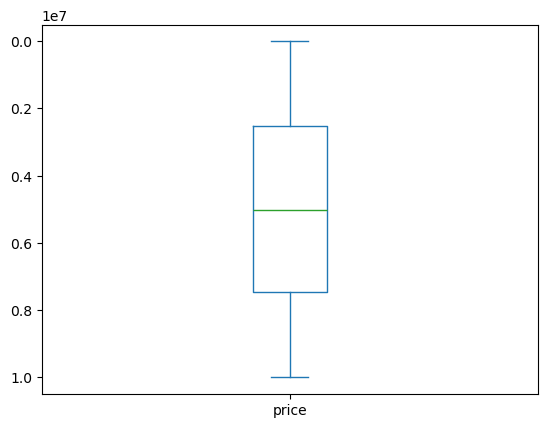

In [23]:
properti_price2.price.plot(kind='box')
plt.gca().invert_yaxis()
plt.show()

Jumlah baris DataFrame sebelum di outlier 10000
Jumlah baris DataFrame sesudah di outlier 10000


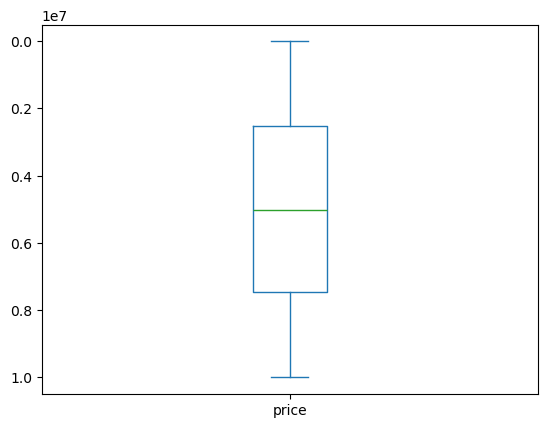

In [24]:
def remove_outlier(df_in):
  for col_name in list(df_in):
    if is_numeric_dtype(df_in[col_name]):
      q1 = df_in[col_name].quantile(0.25)
      q3 = df_in[col_name].quantile(0.75)

      iqr = q3-q1
      batas_atas = q3+(iqr*1.5)
      batas_bawah = q1-(iqr*1.5)

      df_out = df_in.loc[(df_in[col_name]>=batas_bawah) & (df_in[col_name]<=batas_atas)]

  return df_out

properti_price_clean = remove_outlier(properti_price2)
print("Jumlah baris DataFrame sebelum di outlier",properti_price2.shape[0])
print("Jumlah baris DataFrame sesudah di outlier",properti_price_clean.shape[0])
properti_price_clean.price.plot(kind='box', vert=True)

plt.gca().invert_yaxis()
plt.show()

In [25]:
print("data null \n", properti_price_clean.isnull().sum())
print("data kosong \n", properti_price_clean.empty)
print("data nan \n", properti_price_clean.isna().sum())

data null 
 squaremeters         0
numberofrooms        0
hasyard              0
haspool              0
floors               0
citycode             0
citypartrange        0
numprevowners        0
made                 0
isnewbuilt           0
hasstormprotector    0
basement             0
attic                0
garage               0
hasstorageroom       0
hasguestroom         0
price                0
dtype: int64
data kosong 
 False
data nan 
 squaremeters         0
numberofrooms        0
hasyard              0
haspool              0
floors               0
citycode             0
citypartrange        0
numprevowners        0
made                 0
isnewbuilt           0
hasstormprotector    0
basement             0
attic                0
garage               0
hasstorageroom       0
hasguestroom         0
price                0
dtype: int64


In [26]:
X_regress=properti_price_clean.drop('price',axis=1)
y_regress=properti_price_clean.price

X_train_price, X_test_price, y_train_price, y_test_price = train_test_split(X_regress, y_regress, test_size=0.20, random_state=84)

In [27]:
X_regress=properti_price_clean.drop('price',axis=1)
y_regress=properti_price_clean.price

X_train_ins, X_test_ins, y_train_ins, y_test_ins = train_test_split(X_regress, y_regress, test_size=0.20, random_state=84)
cat_cols = X_train_ins.select_dtypes(include=['object']).columns.tolist()
print("Kolom kategorik:",cat_cols)

transformer = make_column_transformer(
    (OneHotEncoder(), cat_cols),
    remainder = 'passthrough'
)

X_train_enc = transformer.fit_transform(X_train_ins)
X_test_enc = transformer.transform(X_test_ins)

df_train_enc = pd.DataFrame (X_train_enc, columns=transformer.get_feature_names_out())
df_test_enc = pd.DataFrame (X_test_enc, columns=transformer.get_feature_names_out())

df_train_enc.head(10)
df_test_enc.head(10)

Kolom kategorik: ['hasyard', 'haspool', 'isnewbuilt', 'hasstormprotector', 'hasstorageroom']


,onehotencoder__hasyard_no,onehotencoder__hasyard_yes,onehotencoder__haspool_no,onehotencoder__haspool_yes,onehotencoder__isnewbuilt_new,onehotencoder__isnewbuilt_old,onehotencoder__hasstormprotector_no,onehotencoder__hasstormprotector_yes,onehotencoder__hasstorageroom_no,onehotencoder__hasstorageroom_yes,...,remainder__numberofrooms,remainder__floors,remainder__citycode,remainder__citypartrange,remainder__numprevowners,remainder__made,remainder__basement,remainder__attic,remainder__garage,remainder__hasguestroom
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,97.0,45.0,62899.0,1.0,9.0,1990.0,4110.0,1675.0,599.0,4.0
1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,76.0,54.0,82737.0,7.0,3.0,1998.0,4010.0,8343.0,260.0,10.0
2,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,72.0,26.0,7812.0,6.0,3.0,1995.0,6972.0,3804.0,828.0,8.0
3,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,46.0,51.0,91317.0,5.0,3.0,2020.0,3337.0,7250.0,337.0,1.0
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,4.0,30.0,8424.0,4.0,10.0,2003.0,5655.0,1684.0,453.0,8.0
5,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,47.0,14.0,50927.0,9.0,6.0,1993.0,4078.0,315.0,767.0,10.0
6,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,54.0,15.0,61691.0,2.0,2.0,2002.0,5925.0,9705.0,342.0,8.0
7,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,42.0,50.0,50833.0,3.0,8.0,2009.0,9320.0,5752.0,936.0,3.0
8,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,97.0,3.0,68804.0,10.0,5.0,1991.0,5804.0,2070.0,846.0,9.0
9,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,18.0,26.0,67302.0,6.0,2.0,2005.0,6111.0,771.0,500.0,10.0


In [44]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error

pipe_Ridge = Pipeline(steps=[
    ('scale', MinMaxScaler()),
    ('feature_selection', SelectKBest(score_func=f_regression)),
    ('reg', Ridge())
    ])

param_grid_Ridge = {
    'reg__alpha': [0.01,0.1,1,10,100],
    'feature_selection__k': np.arange(2,11)
}

GSCV_RR = GridSearchCV(pipe_Ridge, param_grid_Ridge, cv=5,
                      scoring='neg_mean_squared_error', error_score='raise')

GSCV_RR.fit(X_train_enc, y_train_price)

print("Best model:{}".format(GSCV_RR.best_estimator_))
print("Ridge best parameters:{}".format(GSCV_RR.best_params_))
print("Koefisien/bobot:{}".format(GSCV_RR.best_estimator_.named_steps['reg'].coef_))
print("Intercept/bias:{}".format(GSCV_RR.best_estimator_.named_steps['reg'].intercept_))

Ridge_predict = GSCV_RR.predict(X_test_enc)

mse_Ridge = mean_squared_error(y_test_price, Ridge_predict)
mae_Ridge = mean_absolute_error(y_test_price, Ridge_predict)

print("Ridge Mean Squard Error (MSE): {}".format(mse_Ridge))
print("Ridge Mean Absolute Error (MAE): {}".format(mae_Ridge))
print("Ridge Root Mean Squared Error: {}".format(np.sqrt(mse_Ridge)))


Best model:Pipeline(steps=[('scale', MinMaxScaler()),
                ('feature_selection',
                 SelectKBest(score_func=<function f_regression at 0x0000020133634CC0>)),
                ('reg', Ridge(alpha=0.01))])
Ridge best parameters:{'feature_selection__k': 10, 'reg__alpha': 0.01}
Koefisien/bobot:[-1.53069804e+03  1.53069804e+03  8.37049891e+01 -8.37049878e+01
 -5.36117068e+01  5.36117075e+01  9.99077325e+06  4.76218243e+02
 -3.30900310e+01 -4.68782145e+01]
Intercept/bias:15269.991580400616
Ridge Mean Squard Error (MSE): 8244727.333072739
Ridge Mean Absolute Error (MAE): 2337.7145753501745
Ridge Root Mean Squared Error: 2871.3633230701994


In [73]:
df_results['Ridge Prediction'] = Ridge_predict
df_results = pd.DataFrame(y_test_price)
df_results['Ridge Prediction'] = Ridge_predict

df_results['Selisih_price_RR'] = df_results['Ridge Prediction'] - df_results['price']

df_results.head()

,price,Ridge Prediction,Selisih_price_RR
2457,6033313.0,6.034185e+06,872.342258
4865,5290006.8,5.283703e+06,-6304.221330
5288,9235289.5,9.234346e+06,-943.386054
1063,7616002.0,7.617647e+06,1644.933213
5197,9390420.3,9.391224e+06,804.087296


In [74]:
df_results.describe()

,price,Ridge Prediction,Selisih_price_RR
count,2.000000e+03,2.000000e+03,2000.000000
mean,4.931727e+06,4.931782e+06,55.352778
std,2.848679e+06,2.848562e+06,2871.547718
min,2.381840e+04,2.787007e+04,-10833.184798
25%,2.494605e+06,2.495427e+06,-1843.724940
50%,5.014176e+06,5.017360e+06,297.079502
75%,7.338401e+06,7.339645e+06,2355.146005
max,9.994474e+06,9.998520e+06,5919.050249


In [31]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error

pipe_SVR = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('feature_selection', SelectKBest(score_func=f_regression)),
    ('reg', SVR(kernel='linear'))
    ])

param_grid_SVR = {
    'reg__C': [0.01,0.1,1,10],
    'reg__epsilon': [0.1, 0.2, 0.5, 1],
    'feature_selection__k': np.arange(2,11)
}

GSCV_SVR = GridSearchCV(pipe_SVR, param_grid_SVR, cv=5, scoring='neg_mean_squared_error')

GSCV_SVR.fit(X_train_enc, y_train_price)

print("Best model:{}".format(GSCV_SVR.best_estimator_))
print("Ridge best parameters:{}".format(GSCV_SVR.best_params_))
print("Koefisien/bobot:{}".format(GSCV_SVR.best_estimator_.named_steps['reg'].coef_))
print("Intercept/bias:{}".format(GSCV_SVR.best_estimator_.named_steps['reg'].intercept_))

SVR_predict = GSCV_SVR.predict(X_test_enc)

mse_SVR = mean_squared_error(y_test_price, SVR_predict)
mae_SVR = mean_absolute_error(y_test_price, SVR_predict)

print("SVR Mean Squard Error (MSE): {}".format(mse_SVR))
print("SVR Mean Absolute Error (MAE): {}".format(mae_SVR))
print("SVR Root Mean Squared Error: {}".format(np.sqrt(mse_SVR)))


Best model:Pipeline(steps=[('scale', StandardScaler()),
                ('feature_selection',
                 SelectKBest(k=2,
                             score_func=<function f_regression at 0x0000020133634CC0>)),
                ('reg', SVR(C=10, kernel='linear'))])
Ridge best parameters:{'feature_selection__k': 2, 'reg__C': 10, 'reg__epsilon': 0.1}
Koefisien/bobot:[[69203.83142266  1771.44667832]]
Intercept/bias:[5017389.52551094]
SVR Mean Squard Error (MSE): 7733494955101.608
SVR Mean Absolute Error (MAE): 2392029.6675750944
SVR Root Mean Squared Error: 2780916.2078533773


In [32]:
df_results['SVR Prediction'] =SVR_predict
df_results = pd.DataFrame(y_test_price)
df_results['SVR Prediction'] =SVR_predict

df_results['Selisih_price_SVR'] = df_results['SVR Prediction'] - df_results['price']
df_results.head()

,price,SVR Prediction,Selisih_price_SVR
2457,6033313.0,5.044114e+06,-9.891985e+05
4865,5290006.8,5.022385e+06,-2.676220e+05
5288,9235289.5,5.117175e+06,-4.118115e+06
1063,7616002.0,5.078386e+06,-2.537616e+06
5197,9390420.3,5.125272e+06,-4.265149e+06


In [33]:
df_results.describe()

,price,SVR Prediction,Selisih_price_SVR
count,2.000000e+03,2.000000e+03,2.000000e+03
mean,4.931727e+06,5.015550e+06,8.382343e+04
std,2.848679e+06,6.835477e+04,2.780348e+06
min,2.381840e+04,4.896081e+06,-4.858343e+06
25%,2.494605e+06,4.957087e+06,-2.266067e+06
50%,5.014176e+06,5.018407e+06,2.438072e+03
75%,7.338401e+06,5.072981e+06,2.461521e+06
max,9.994474e+06,5.138576e+06,4.874318e+06


In [35]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Membuat pipeline dengan SelectPercentile
pipe_SVR_percentile = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('feature_selection', SelectPercentile(score_func=f_regression)),
    ('reg', SVR(kernel='linear'))
])

# Parameter grid untuk GridSearchCV
param_grid_SVR_percentile = {
    'reg__C': [0.01,0.1,1,10],
    'reg__epsilon': [0.1, 0.2, 0.5, 1],
    'feature_selection__percentile': [10, 20, 30, 40, 50, 60, 70, 80, 90]  # Menggunakan percentile
}

# Membuat objek GridSearchCV
GSCV_SVR = GridSearchCV(pipe_SVR_percentile, param_grid_SVR_percentile, cv=5, scoring='neg_mean_squared_error')

# Fitting model
GSCV_SVR.fit(X_train_enc, y_train_price)

# Output hasil terbaik
print("Best model: {}".format(GSCV_SVR.best_estimator_))
print("SVR best parameters: {}".format(GSCV_SVR.best_params_))

# Menghitung koefisien dan intercept
try:
    print("Koefisien/bobot: {}".format(GSCV_SVR.best_estimator_.named_steps['reg'].coef_))
    print("Intercept/bias: {}".format(GSCV_SVR.best_estimator_.named_steps['reg'].intercept_))
except AttributeError:
    print("SVR tidak memiliki koefisien yang dapat diakses secara langsung.")

# Melakukan prediksi
SVR_predict = GSCV_SVR.predict(X_test_enc)

# Menghitung MSE dan MAE
mse_SVR = mean_squared_error(y_test_price, SVR_predict)
mae_SVR = mean_absolute_error(y_test_price, SVR_predict)

# Menampilkan hasil
print("SVR Mean Squared Error (MSE): {}".format(mse_SVR))
print("SVR Mean Absolute Error (MAE): {}".format(mae_SVR))
print("SVR Root Mean Squared Error: {}".format(np.sqrt(mse_SVR)))


Best model: Pipeline(steps=[('scale', StandardScaler()),
                ('feature_selection',
                 SelectPercentile(score_func=<function f_regression at 0x0000020133634CC0>)),
                ('reg', SVR(C=10, kernel='linear'))])
SVR best parameters: {'feature_selection__percentile': 10, 'reg__C': 10, 'reg__epsilon': 0.1}
Koefisien/bobot: [[69203.83142266  1771.44667832]]
Intercept/bias: [5017389.52551094]
SVR Mean Squared Error (MSE): 7733494955101.608
SVR Mean Absolute Error (MAE): 2392029.6675750944
SVR Root Mean Squared Error: 2780916.2078533773


In [36]:
df_results['SVR Percentile Prediction'] =SVR_predict 
df_results = pd.DataFrame(y_test_price)
df_results['SVR Percentile Prediction'] =SVR_predict 

df_results['Selisih_price_SVR_percentile'] = df_results['SVR Percentile Prediction'] - df_results['price'] 
df_results.head()

,price,SVR Percentile Prediction,Selisih_price_SVR_percentile
2457,6033313.0,5.044114e+06,-9.891985e+05
4865,5290006.8,5.022385e+06,-2.676220e+05
5288,9235289.5,5.117175e+06,-4.118115e+06
1063,7616002.0,5.078386e+06,-2.537616e+06
5197,9390420.3,5.125272e+06,-4.265149e+06


In [37]:
df_results.describe()

,price,SVR Percentile Prediction,Selisih_price_SVR_percentile
count,2.000000e+03,2.000000e+03,2.000000e+03
mean,4.931727e+06,5.015550e+06,8.382343e+04
std,2.848679e+06,6.835477e+04,2.780348e+06
min,2.381840e+04,4.896081e+06,-4.858343e+06
25%,2.494605e+06,4.957087e+06,-2.266067e+06
50%,5.014176e+06,5.018407e+06,2.438072e+03
75%,7.338401e+06,5.072981e+06,2.461521e+06
max,9.994474e+06,5.138576e+06,4.874318e+06


In [38]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error


pipe_Ridge_percentile = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('feature_selection', SelectPercentile(score_func=f_regression)),
    ('reg', Ridge())
])

param_grid_Ridge_percentile = {
    'reg__alpha': [0.01, 0.1, 1, 10, 100],
    'feature_selection__percentile': [10, 20, 30, 40, 50, 60, 70, 80, 90]  # Mengganti 'k' dengan 'percentile'
}

GSCV_RR = GridSearchCV(pipe_Ridge_percentile, param_grid_Ridge_percentile, cv=5,
                       scoring='neg_mean_squared_error', error_score='raise')

GSCV_RR.fit(X_train_enc, y_train_price)

print("Best model: {}".format(GSCV_RR.best_estimator_))
print("Ridge best parameters: {}".format(GSCV_RR.best_params_))
print("Koefisien/bobot: {}".format(GSCV_RR.best_estimator_.named_steps['reg'].coef_))
print("Intercept/bias: {}".format(GSCV_RR.best_estimator_.named_steps['reg'].intercept_))

Ridge_predict = GSCV_RR.predict(X_test_enc)

mse_Ridge = mean_squared_error(y_test_price, Ridge_predict)
mae_Ridge = mean_absolute_error(y_test_price, Ridge_predict)

print("Ridge Mean Squared Error (MSE): {}".format(mse_Ridge))
print("Ridge Mean Absolute Error (MAE): {}".format(mae_Ridge))
print("Ridge Root Mean Squared Error: {}".format(np.sqrt(mse_Ridge)))


Best model: Pipeline(steps=[('scale', StandardScaler()),
                ('feature_selection',
                 SelectPercentile(percentile=90,
                                  score_func=<function f_regression at 0x0000020133634CC0>)),
                ('reg', Ridge(alpha=0.01))])
Ridge best parameters: {'feature_selection__percentile': 90, 'reg__alpha': 0.01}
Koefisien/bobot: [ 1.49636141e+03 -7.55922006e+02  7.55922004e+02  4.14416376e+01
 -4.14416377e+01 -3.87150865e+01  3.87150862e+01 -6.77404283e+00
  6.77404323e+00  2.88436798e+06 -4.56405366e-02  1.59112848e+03
  1.48200813e+02 -1.43371744e+01 -1.86279947e+01 -1.15977886e+01
  3.17189986e+01 -8.23109475e+00]
Intercept/bias: 5008877.6749249995
Ridge Mean Squared Error (MSE): 3540144.7107716934
Ridge Mean Absolute Error (MAE): 1463.0366330413735
Ridge Root Mean Squared Error: 1881.527228283368


In [76]:
df_results['Ridge Percentile Prediction'] = Ridge_predict
df_results = pd.DataFrame(y_test_price)
df_results['Ridge Percentile Prediction'] = Ridge_predict

df_results['Selisih_price_RR_percentile'] = df_results['Ridge Percentile Prediction'] - df_results['price']

df_results.head()

,price,Ridge Percentile Prediction,Selisih_price_RR_percentile
2457,6033313.0,6.034185e+06,872.342258
4865,5290006.8,5.283703e+06,-6304.221330
5288,9235289.5,9.234346e+06,-943.386054
1063,7616002.0,7.617647e+06,1644.933213
5197,9390420.3,9.391224e+06,804.087296


In [77]:
df_results.describe()

,price,Ridge Percentile Prediction,Selisih_price_RR_percentile
count,2.000000e+03,2.000000e+03,2000.000000
mean,4.931727e+06,4.931782e+06,55.352778
std,2.848679e+06,2.848562e+06,2871.547718
min,2.381840e+04,2.787007e+04,-10833.184798
25%,2.494605e+06,2.495427e+06,-1843.724940
50%,5.014176e+06,5.017360e+06,297.079502
75%,7.338401e+06,7.339645e+06,2355.146005
max,9.994474e+06,9.998520e+06,5919.050249


          price  Ridge Prediction  SVR Prediction  \
2457  6033313.0      6.034185e+06    5.044114e+06   
4865  5290006.8      5.283703e+06    5.022385e+06   
5288  9235289.5      9.234346e+06    5.117175e+06   
1063  7616002.0      7.617647e+06    5.078386e+06   
5197  9390420.3      9.391224e+06    5.125272e+06   

      Ridge Percentile Prediction  SVR Percentile Prediction  \
2457                 6.034185e+06               5.044114e+06   
4865                 5.283703e+06               5.022385e+06   
5288                 9.234346e+06               5.117175e+06   
1063                 7.617647e+06               5.078386e+06   
5197                 9.391224e+06               5.125272e+06   

      Selisih_price_RR  Selisih_price_SVR  Selisih_price_RR_percentile  \
2457        872.342258      -9.891985e+05                   872.342258   
4865      -6304.221330      -2.676220e+05                 -6304.221330   
5288       -943.386054      -4.118115e+06                  -943.386054   


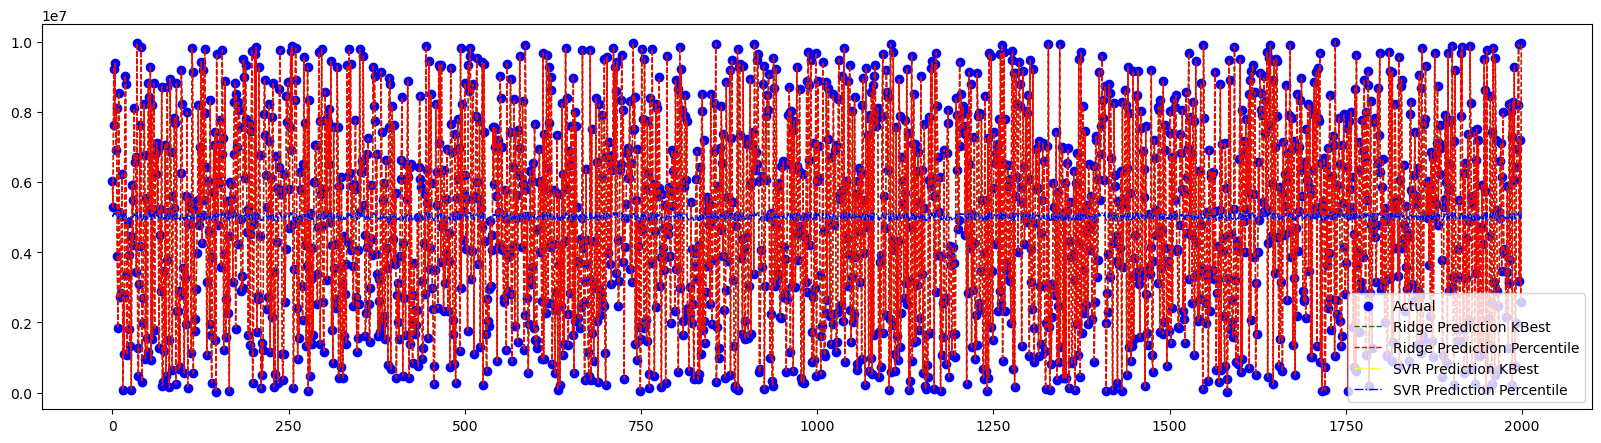

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

# Misalkan Ridge_predict dan SVR_predict sudah didefinisikan sebelumnya
# Ridge_predict = model_ridge.predict(X_test)
# SVR_predict = model_svr.predict(X_test)

# Mengonversi y_test_price menjadi DataFrame
df_results = pd.DataFrame(y_test_price)

# Menambahkan kolom prediksi
df_results['Ridge Prediction'] = Ridge_predict
df_results['SVR Prediction'] = SVR_predict  # Pastikan ini ada

# Jika ada kolom lain yang perlu ditambahkan
df_results['Ridge Percentile Prediction'] = Ridge_predict
df_results['SVR Percentile Prediction'] = SVR_predict  # Pastikan kamu sudah menambahkan ini juga

# Menghitung selisih
df_results['Selisih_price_RR'] = df_results['Ridge Prediction'] - df_results['price']
df_results['Selisih_price_SVR'] = df_results['SVR Prediction'] - df_results['price']
df_results['Selisih_price_RR_percentile'] = df_results['Ridge Percentile Prediction'] - df_results['price']
df_results['Selisih_price_SVR_percentile'] = df_results['SVR Percentile Prediction'] - df_results['price']

# Menampilkan beberapa data teratas
print(df_results.head())

# Membuat plot
plt.figure(figsize=(20, 5))
data_len = range(len(y_test_price))
plt.scatter(data_len, df_results['price'], label="Actual", color="blue")
plt.plot(data_len, df_results['Ridge Prediction'], label="Ridge Prediction KBest", color="green", linewidth=1, linestyle="dashed")
plt.plot(data_len, df_results['Ridge Percentile Prediction'], label="Ridge Prediction Percentile", color="red", linewidth=1, linestyle="dashed")
plt.plot(data_len, df_results['SVR Prediction'], label="SVR Prediction KBest", color="yellow", linewidth=1, linestyle="-.")
plt.plot(data_len, df_results['SVR Percentile Prediction'], label="SVR Prediction Percentile", color="blue", linewidth=1, linestyle="-.")

# Menambahkan legenda dan menampilkan plot
plt.legend()
plt.show()
